# Módulo 1: Análisis de datos en el ecosistema Python

### Sesión (26)

# `ALEJANDRO SÁNCHEZ MONZÓN`

**18/03/2023**

# Modelado estadístico

In [169]:
# importamos las librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [170]:
# Modificamos los parámetros de los gráficos en matplotlib
from matplotlib.pyplot import rcParams

rcParams['figure.figsize'] = 12, 6 # el primer dígito es el ancho y el segundo el alto
rcParams["font.weight"] = "bold"
rcParams["font.size"] = 10
rcParams["axes.labelweight"] = "bold"

---

### **`Ejercicio 26.1`**

Vamos a nalizar los datos de **`Sunspots Dataset`** que son números promediados mensuales de **manchas solares desde 1749 hasta 1983**. Esta serie temporal se ha recolectado en el _Observatorio Federal Suizo_ (_**Zúrich**_) hasta **1960**, luego en el _Observatorio Astronómico de Japón_ (**_Tokio_**).  

Los números de manchas solares son una *medida de la actividad solar*. Los datos vienen en las unidades originales utilizadas por los observadores de forma bruta y **no hay ajustes** por cambios en la instrumentación o sesgo del observador.

In [171]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el dataset
df_spot = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/monthly-sunspots.csv', index_col=False)
df_spot


,Month,Sunspots
0,1749-01,58.0
1,1749-02,62.6
2,1749-03,70.0
3,1749-04,55.7
4,1749-05,85.0
...,...,...
2815,1983-08,71.8
2816,1983-09,50.3
2817,1983-10,55.8
2818,1983-11,33.3


In [172]:
# Convertir la columna en fechas tipo DatetimeIndex
df_spot['fechas'] = pd.to_datetime(df_spot['Month'], format='%Y-%m')

# Convertir la columna de fechas a los índices del DataFrame
df_spot.set_index('fechas', inplace=True)

# Quitar las columnas que ya no se usan
df_spot.drop(columns='Month', inplace=True)

df_spot

,Sunspots
fechas,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1983-08-01,71.8
1983-09-01,50.3
1983-10-01,55.8


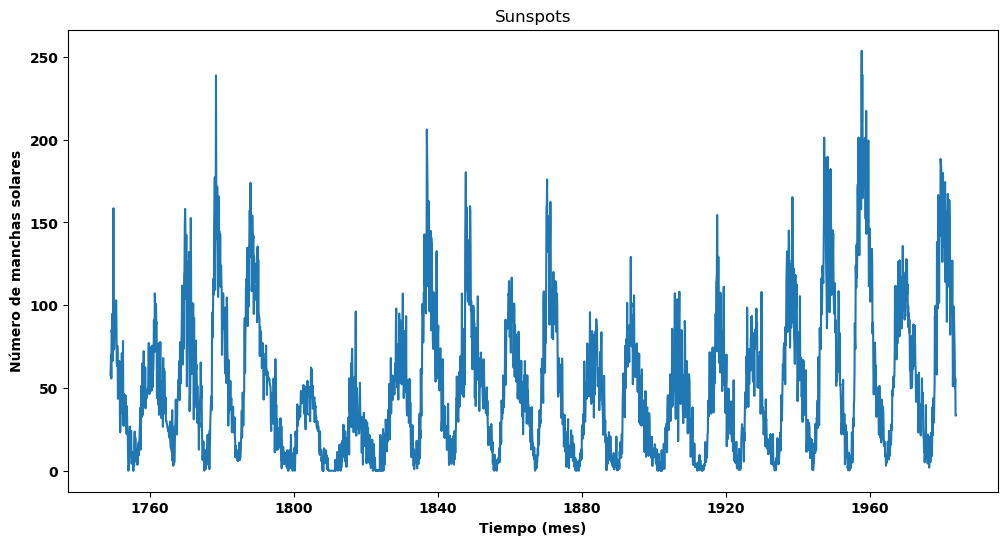

In [173]:
plt.plot(df_spot)
plt.xlabel('Tiempo (mes)')
plt.ylabel('Número de manchas solares')
plt.title('Sunspots')
plt.show()

Vamos a modelar la serie temporal con el objetivo de **predecir los valores mensuales del último año**. 

**`26.1.1`** Aplica el método de `Seasonal Naïve` a la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Grafica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y R2.

**`26.1.2`** Aplica el método de `Autoregresión - AR(24)` la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y R2.

**`26.1.3`** Aplica el método de `SARIMA (4,1,1)(2,0,0)12` la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (curvas de diagnóstico, correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y R2.

**`26.1.4`** Aplica el método de `Holt-Winters Exponential Smoothing` la serie temporal y consigue estos puntos **y analiza los resultados obtenidos**:
- Resumen del modelo ajustado (_Model fit summary_) 
- Gráfica de "_Datos reales vs. Estimación del modelo (In-Sample forecasting)_"
- Gráficas de análisis del componente residual (correlaciones con otras variables)
- Gráfica de "_Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)_"
- Gráfica interactiva con el histórico, la predicción y los valores reales del último año. 
- Las métricas de "_Out-of-sample performance_": MAE, MAPE, MSE, RMSE y R2.

---

In [174]:
## Solución 26.1.1
df_test_spot = df_spot.tail(12)
df_test_spot


,Sunspots
fechas,
1983-01-01,84.3
1983-02-01,51.0
1983-03-01,66.5
1983-04-01,80.7
1983-05-01,99.2
1983-06-01,91.1
1983-07-01,82.2
1983-08-01,71.8
1983-09-01,50.3


In [175]:
df_train_spot = df_spot.loc[df_spot.index.isin(df_test_spot.index)==False]
df_train_spot


,Sunspots
fechas,
1749-01-01,58.0
1749-02-01,62.6
1749-03-01,70.0
1749-04-01,55.7
1749-05-01,85.0
...,...
1982-08-01,107.6
1982-09-01,118.8
1982-10-01,94.7


In [176]:
pred_spot = pd.DataFrame(data=df_train_spot.tail(12).values, index=df_test_spot.index, columns=['pred'])
pred_spot

,pred
fechas,
1983-01-01,111.2
1983-02-01,163.6
1983-03-01,153.8
1983-04-01,122.0
1983-05-01,82.2
1983-06-01,110.4
1983-07-01,106.1
1983-08-01,107.6
1983-09-01,118.8


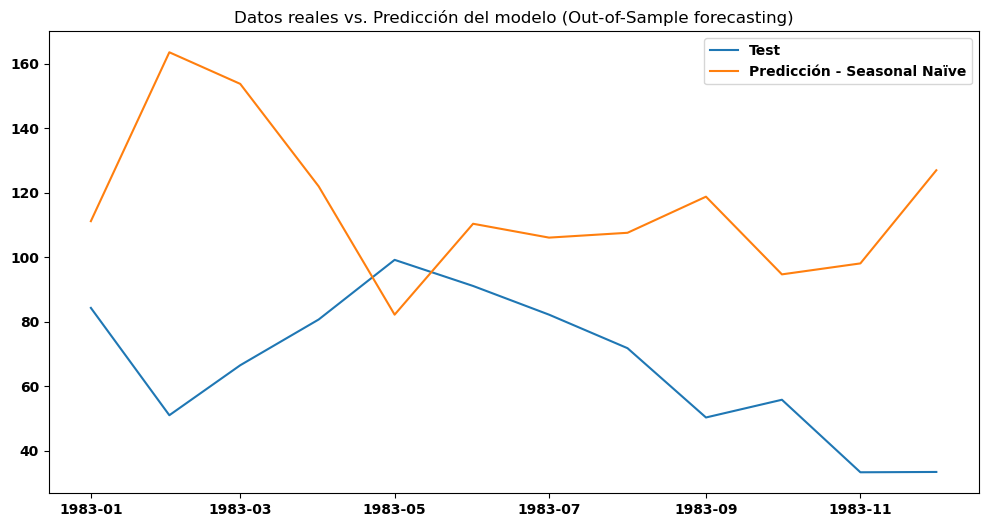

In [177]:
plt.plot(df_test_spot, label='Test')
plt.plot(pred_spot, label='Predicción - Seasonal Naïve')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [178]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train_spot.index,
    y=df_train_spot['Sunspots'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test_spot.index,
    y=df_test_spot['Sunspots'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_spot.index,
    y=pred_spot['pred'],
    name="Predicción (Seasonal Naive)",
    mode="markers+lines"
    ))

fig.update_layout(title="Manchas solares de cada mes desde el año 1749 al 1983",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Sunspots'
                  )

fig.show()

In [179]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print("Out-of-sample performance:  Seasonal Naive")
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test_spot, pred_spot))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test_spot, pred_spot)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test_spot, pred_spot))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test_spot, pred_spot)))
print('R^2 coefficient of determination:', r2_score(df_test_spot, pred_spot))

Out-of-sample performance:  Seasonal Naive
Mean Absolute Error (MAE): 52.49166666666667
Mean Absolute Percentage Error (MAPE): 102.7615492933623
Mean Squared Error (MSE): 3700.7624999999994
Root Mean Squared Error (RMSE): 60.833892691492295
R^2 coefficient of determination: -7.407119211357619


#### Explicación 26.1.1
> Podemos observar una gráfica de SN que relaciona datos reales versus predichos de una forma algo erronea, donde podemos ver que la grafica de las predicciones tienen una tendencia en espejo a la de test.
>
> En la gráfica interactiva podemos observar la misma gráfica anterior. Pero puediendo analizarla de una forma más detallada.
>
> Si sacamos las métricas de sklearn podemos observar resultados bastante mediocres con un -7 de R2, y una media de error muy alta. Esto demuestra qque la prediccion no es para nada buena.

In [180]:
## Solución 26.1.2
from statsmodels.tsa.ar_model import AutoReg

modelo_ar_26_1_2 = AutoReg(df_train_spot, lags=24)
modelo_ar_26_1_2

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [181]:
fit_ar_26_1_2 = modelo_ar_26_1_2.fit()

estim_ar_26_1_2 = fit_ar_26_1_2.fittedvalues
estim_ar_26_1_2

fechas
1751-01-01     76.615508
1751-02-01     77.938945
1751-03-01     55.272857
1751-04-01     55.794414
1751-05-01     54.978830
                 ...    
1982-08-01    106.992668
1982-09-01    104.779365
1982-10-01    107.725277
1982-11-01    102.017089
1982-12-01     99.793929
Length: 2784, dtype: float64

In [182]:
fit_ar_26_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            AutoReg Model Results                             
==============================================================================
Dep. Variable:               Sunspots   No. Observations:                 2808
Model:                    AutoReg(24)   Log Likelihood              -11520.417
Method:               Conditional MLE   S.D. of innovations             15.167
Date:                Sat, 23 Mar 2024   AIC                          23092.834
Time:                        20:54:16   BIC                          23247.057
Sample:                    01-01-1751   HQIC                         23148.519
                         - 12-01-1982                                         
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            3.8145      0.501      7.614      0.000       2.833       4.796
Sunspots.L1      0.5394      0.019     28.515      0.000       0.502       0.576
Sunspots.L2      0.0985      0.021      4.589      0.000       0.056       0.141
Sunspots.L3      0.0834      0.022      3.870      0.000       0.041       0.126
Sunspots.L4      0.0827      0.022      3.831      0.000       0.040       0.125
Sunspots.L5      0.0428      0.022      1.978      0.048       0.000       0.085
Sunspots.L6      0.0500      0.022      2.307      0.021       0.008       0.092
Sunspots.L7      0.0103      0.022      0.477      0.634      -0.032       0.053
Sunspots.L8      0.0111      0.022      0.512      0.609      -0.031       0.054
Sunspots.L9      0.1058      0.022      4.880      0.000       0.063       0.148
Sunspots.L10     0.0251      0.022      1.153      0.249      -0.018       0.068
Sunspots.L11     0.0195      0.022      0.898      0.369      -0.023       0.062
Sunspots.L12     0.0273      0.022      1.251      0.211      -0.015       0.070
Sunspots.L13    -0.0182      0.022     -0.833      0.405      -0.061       0.025
Sunspots.L14     0.0030      0.022      0.137      0.891      -0.040       0.045
Sunspots.L15     0.0431      0.022      1.990      0.047       0.001       0.086
Sunspots.L16    -0.0320      0.022     -1.484      0.138      -0.074       0.010
Sunspots.L17    -0.0027      0.022     -0.126      0.900      -0.045       0.040
Sunspots.L18    -0.0659      0.022     -3.054      0.002      -0.108      -0.024
Sunspots.L19    -0.0012      0.022     -0.054      0.957      -0.044       0.041
Sunspots.L20    -0.0241      0.022     -1.115      0.265      -0.067       0.018
Sunspots.L21    -0.0419      0.022     -1.939      0.052      -0.084       0.000
Sunspots.L22    -0.0148      0.022     -0.688      0.492      -0.057       0.027
Sunspots.L23     0.0536      0.021      2.497      0.013       0.012       0.096
Sunspots.L24    -0.0699      0.019     -3.688      0.000      -0.107      -0.033
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -1.0871           -0.1654j            1.0996           -0.4760
AR.2            -1.0871           +0.1654j            1.0996            0.4760
AR.3            -1.0346           -0.4536j            1.1296           -0.4342
AR.4            -1.0346           +0.4536j            1.1296            0.4342
AR.5            -0.8960           -0.6799j            1.1248           -0.3967
AR.6            -0.8960           +0.6799j            1.1248            0.3967
AR.7            -0.6366           -0.8929j            1.0966           -0.3486
AR.8            -0.6366           +0.8929j            1.0966            0.3486
AR.9            -0.3931  

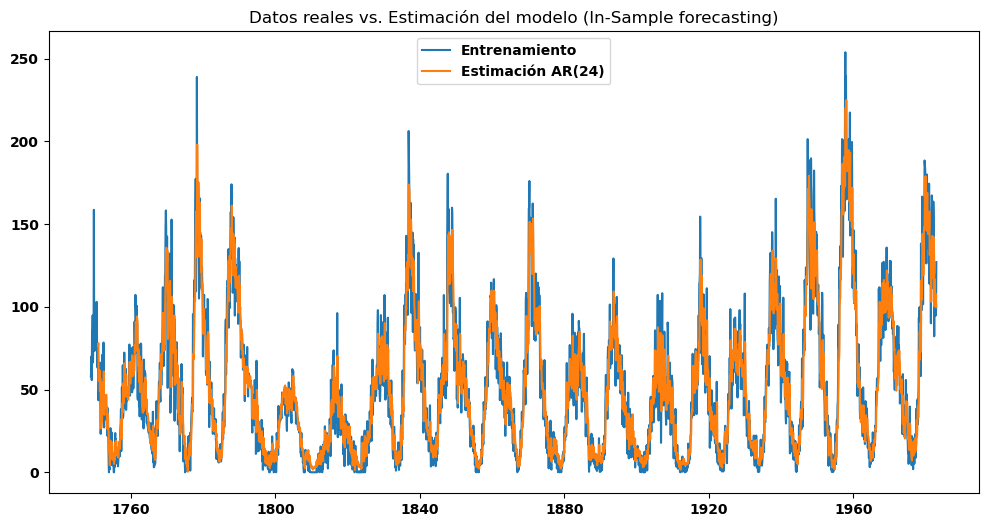

In [183]:
plt.plot(df_train_spot, label='Entrenamiento')
plt.plot(estim_ar_26_1_2, label='Estimación AR(24)')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

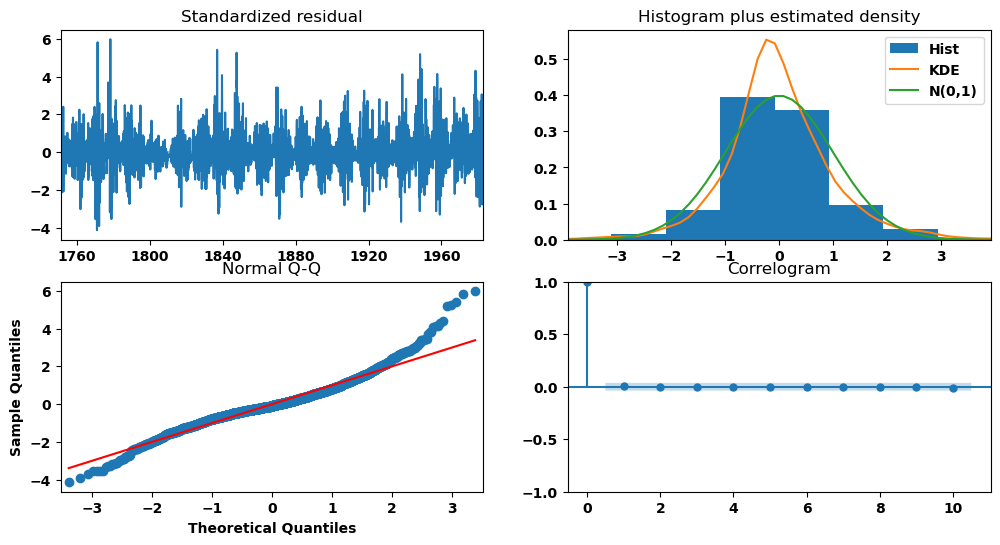

In [184]:
fit_ar_26_1_2.plot_diagnostics()
plt.show()

In [185]:
fit_ar_26_1_2.predict(start=df_test_spot.index[0],
               end=df_test_spot.index[-1])

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



1983-01-01    111.945298
1983-02-01    100.362562
1983-03-01     97.841956
1983-04-01     87.723565
1983-05-01     84.653350
1983-06-01     86.181731
1983-07-01     80.820223
1983-08-01     72.792004
1983-09-01     72.974528
1983-10-01     69.824827
1983-11-01     70.158801
1983-12-01     64.955116
Freq: MS, dtype: float64

In [186]:
pred_ar_26_1_2 = fit_ar_26_1_2.forecast(steps=12).round()
pred_ar_26_1_2

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning:

Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.



1983-01-01    112.0
1983-02-01    100.0
1983-03-01     98.0
1983-04-01     88.0
1983-05-01     85.0
1983-06-01     86.0
1983-07-01     81.0
1983-08-01     73.0
1983-09-01     73.0
1983-10-01     70.0
1983-11-01     70.0
1983-12-01     65.0
Freq: MS, dtype: float64

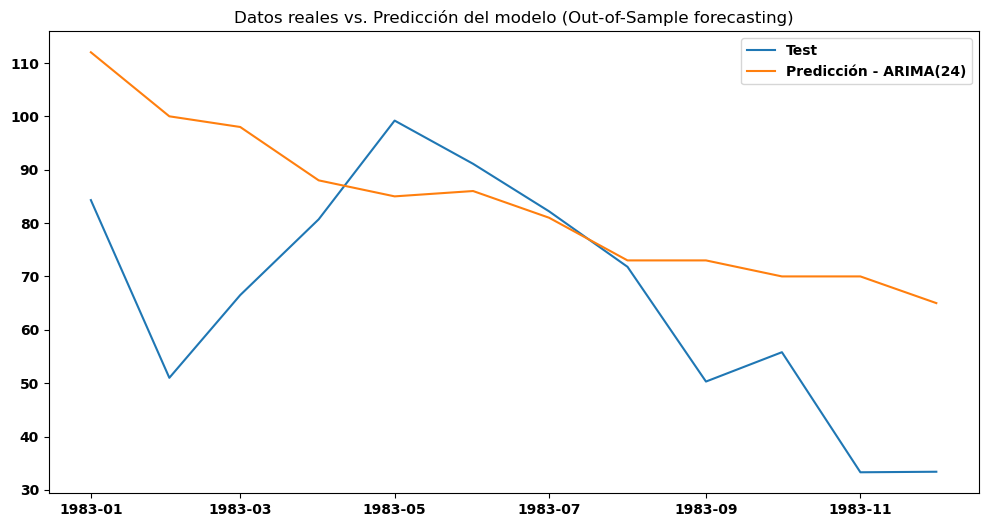

In [187]:
plt.plot(df_test_spot, label='Test')
plt.plot(pred_ar_26_1_2, label='Predicción - ARIMA(24)')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [188]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train_spot.index,
    y=df_train_spot['Sunspots'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test_spot.index,
    y=df_test_spot['Sunspots'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_ar_26_1_2.index,
    y=pred_ar_26_1_2,
    name="Predicción (AR(24))",
    mode="markers+lines"
    ))

fig.update_layout(title="Número de manchas solares de cada mes desde el año 1749 al 1983",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Manchas solares'
                  )

fig.show()

In [189]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test_spot, pred_ar_26_1_2))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test_spot, pred_ar_26_1_2)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test_spot, pred_ar_26_1_2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test_spot, pred_ar_26_1_2)))
print('R^2 coefficient of determination:', r2_score(df_test_spot, pred_ar_26_1_2))

Mean Absolute Error (MAE): 20.199999999999996
Mean Absolute Percentage Error (MAPE): 40.316141978040484
Mean Squared Error (MSE): 625.5616666666667
Root Mean Squared Error (RMSE): 25.01123081071115
R^2 coefficient of determination: -0.4211048414271992


#### Explicación 26.1.2
> El resumen del ajuste, mestra un modelo de Autoreg(24) (el modelo deseado). Teniendo una gráfica entre datos reales versus la estimación, podemos observar que la tendencia de valores si es parecida a la de los datos de entrenamiento. Pero con algunos errores.
>
> En las cuatro gráficas del diagnóstico, podemos ver que la gráfica de residuos estandarizados presenta unos patrones para nada agradables, donde no se puede sacar en claro ninguna dispersión aleatoria. Por otro lado, en el histograma podemos ver una forma de campana. Pero no muy definida. Para la grafica de Q-Q podemos ver que tanto al inicio como al final, los valores se alejan de la linea recta de guía, que indicaría la buena prediccion. Por último, en la gráfica de correlación, podemos ver que se encuentran pegados al 0, lo que puede llegar a mostrar una autocorrelación.
>
> Para la gráfica de datos reales versus predicciones, vemos que la predicción tiene una tendencia de datos descendente, que en poco se parece a los datos reales. Esto se ve de una forma más detallada en la gráfica interactiva.
>
> Por último, podemos ver en las metricas valores muy malos de R2 (-0.4) y una media de error muy alta. Lo que demuestra que no es un buen modelo.

In [190]:
## Solución 26.1.3
from statsmodels.tsa.statespace.sarimax import SARIMAX

modelo_sarimax_26_1_2 = SARIMAX(df_train_spot,
                          order=(4,1,1),
                          seasonal_order=(2,0,0,12))
modelo_sarimax_26_1_2

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [191]:
fit_sarimax_26_1_2 = modelo_sarimax_26_1_2.fit()

estim_sarimax_26_1_2 = fit_sarimax_26_1_2.fittedvalues
estim_sarimax_26_1_2

fechas
1749-01-01      0.000000
1749-02-01     57.994849
1749-03-01     61.216102
1749-04-01     66.370182
1749-05-01     58.658296
                 ...    
1982-08-01    113.137477
1982-09-01    109.408319
1982-10-01    114.709096
1982-11-01    100.682251
1982-12-01    100.907895
Length: 2808, dtype: float64

In [192]:
fit_sarimax_26_1_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                            Sunspots   No. Observations:                 2808
Model:             SARIMAX(4, 1, 1)x(2, 0, [], 12)   Log Likelihood              -11716.900
Date:                             Sat, 23 Mar 2024   AIC                          23449.800
Time:                                     20:54:21   BIC                          23497.319
Sample:                                 01-01-1749   HQIC                         23466.950
                                      - 12-01-1982                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1002      0.108      0.925      0.355      -0.112       0.312
ar.L2         -0.0857      0.047     -1.822      0.069      -0.178       0.007
ar.L3         -0.0593      0.034     -1.760      0.078      -0.125       0.007
ar.L4         -0.0048      0.029     -0.164      0.870      -0.062       0.052
ma.L1         -0.5140      0.108     -4.768      0.000      -0.725      -0.303
ar.S.L12       0.0696      0.016      4.479      0.000       0.039       0.100
ar.S.L24      -0.0436      0.017     -2.602      0.009      -0.077      -0.011
sigma2       247.2289      4.138     59.750      0.000     239.119     255.339
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              1356.13
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               1.37   Skew:                             0.46
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.28
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

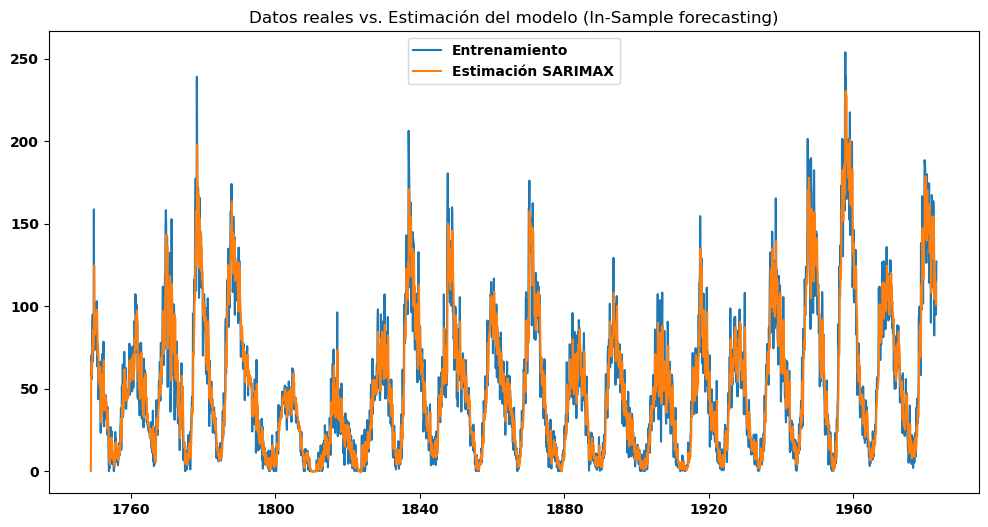

In [193]:
plt.plot(df_train_spot, label='Entrenamiento')
plt.plot(estim_sarimax_26_1_2, label='Estimación SARIMAX')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

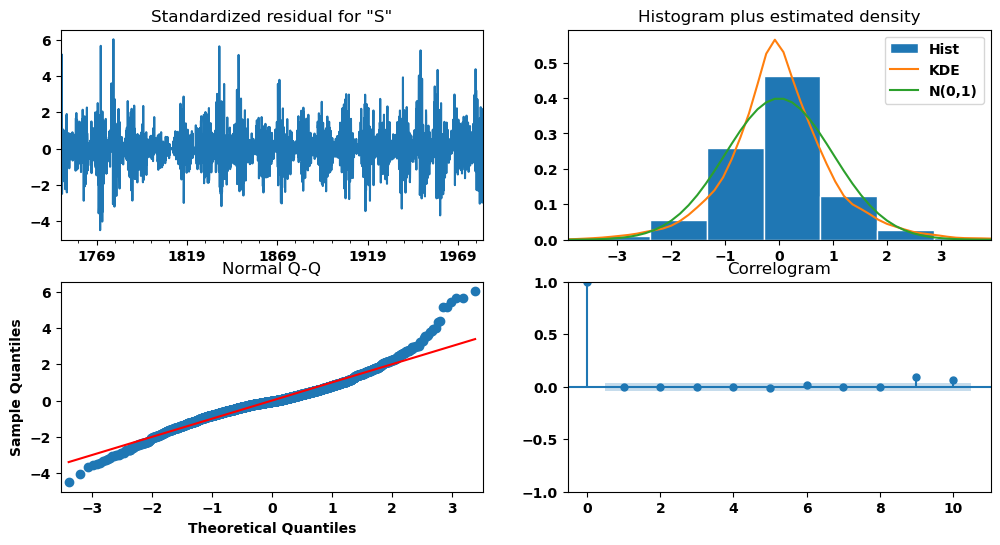

In [194]:
fit_sarimax_26_1_2.plot_diagnostics()
plt.show()

In [195]:
pred_sarimax_26_1_2 = fit_sarimax_26_1_2.forecast(steps=12).round()
pred_sarimax_26_1_2

1983-01-01    117.0
1983-02-01    116.0
1983-03-01    115.0
1983-04-01    112.0
1983-05-01    111.0
1983-06-01    115.0
1983-07-01    112.0
1983-08-01    111.0
1983-09-01    112.0
1983-10-01    110.0
1983-11-01    112.0
1983-12-01    113.0
Freq: MS, Name: predicted_mean, dtype: float64

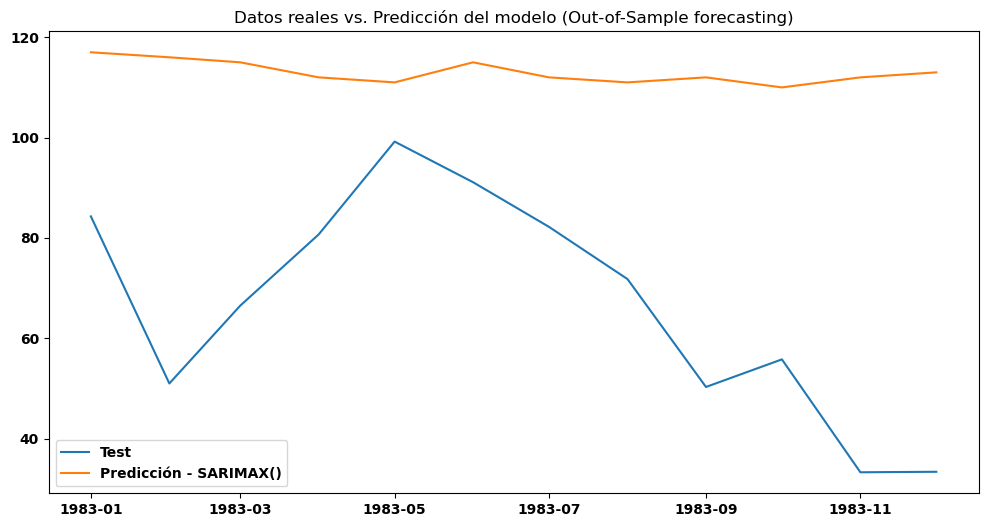

In [196]:
plt.plot(df_test_spot, label='Test')
plt.plot(pred_sarimax_26_1_2, label='Predicción - SARIMAX()')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [197]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train_spot.index,
    y=df_train_spot['Sunspots'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test_spot.index,
    y=df_test_spot['Sunspots'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_sarimax_26_1_2.index,
    y=pred_sarimax_26_1_2,
    name="Predicción (SARIMAX)",
    mode="markers+lines"
    ))

fig.update_layout(title="Número de manchas solares de cada mes desde el año 1749 al 1983",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Manchas solares'
                  )

fig.show()

In [198]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test_spot, pred_sarimax_26_1_2))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test_spot, pred_sarimax_26_1_2)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test_spot, pred_sarimax_26_1_2))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test_spot, pred_sarimax_26_1_2)))
print('R^2 coefficient of determination:', r2_score(df_test_spot, pred_sarimax_26_1_2))

Mean Absolute Error (MAE): 46.36666666666667
Mean Absolute Percentage Error (MAPE): 91.78287535250055
Mean Squared Error (MSE): 2586.311666666667
Root Mean Squared Error (RMSE): 50.85579285260104
R^2 coefficient of determination: -4.875392030532


#### Explicación 26.1.3
> Podemos observar en el resumen del modelo que efectivamente de trata de un modelo SARIMAX(4,1,1)x(2,0,0,12).
>
> Para la gráfica de datos reales versus la estimación del modelo, vemos que las estimaciones tienen una tendencia que sigue a los datos reales, pero que sigue mostrando ciertas diferencias.
>
> Para las cuatro gráficas de diagnóstico, podemos hacer exactamente el mismo análisis que en el ejercicio anterior, solo pudiendo destacar diferencias mínimas.
>
> Tanto en la gráfica de datos rales versus predicciones del modelo, y más detalladamente en la gráfica interactiva. Podemos observar que las predicciones no muestran ningun tipo de criterio, mostrando una línea relativamente recta, cuando los datos reales no muestran dicha tendencia.
>
> Por último, volvemos a destacar unas métricas muy malas, con un R2 de -4. Y un porcentaje de error muy alto.

In [199]:
## Solución 26.1.4
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo_exp_26_1_4 = ExponentialSmoothing(df_train_spot,
                                        trend='add',
                                        seasonal='add',
                                        seasonal_periods=12)

modelo_exp_26_1_4

c:\Users\aleja\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



In [200]:
fit_exp_26_1_4 = modelo_exp_26_1_4.fit()

estim_exp_26_1_4 = fit_exp_26_1_4.fittedvalues
estim_exp_26_1_4

fechas
1749-01-01     74.651538
1749-02-01     62.404492
1749-03-01     65.969612
1749-04-01     66.545936
1749-05-01     63.845755
                 ...    
1982-08-01    109.862582
1982-09-01    116.772211
1982-10-01    109.984916
1982-11-01     91.422638
1982-12-01    101.324678
Length: 2808, dtype: float64

In [201]:
fit_exp_26_1_4.summary()

Dep. Variable:,Sunspots,No. Observations:,2808
Model:,ExponentialSmoothing,SSE,750166.551
Optimized:,True,AIC,15722.606
Trend:,Additive,BIC,15817.650
Seasonal:,Additive,AICC,15722.852
Seasonal Periods:,12,Date:,"Sat, 23 Mar 2024"
Box-Cox:,False,Time:,20:54:23
Box-Cox Coeff.:,None,,
,coeff,code,optimized
smoothing_level,0.4925451,alpha,True
smoothing_trend,0.0340978,beta,True


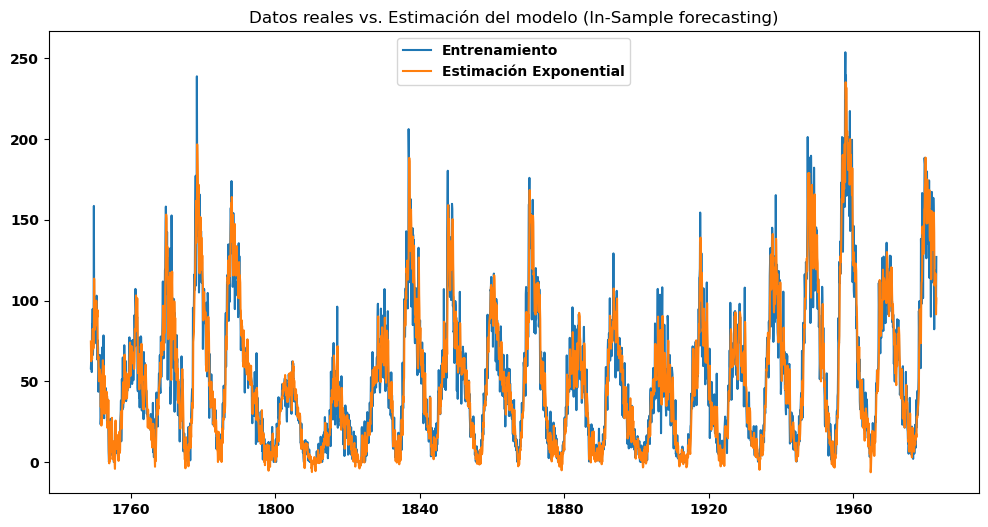

In [202]:
plt.plot(df_train_spot, label='Entrenamiento')
plt.plot(estim_exp_26_1_4, label='Estimación Exponential')
plt.title("Datos reales vs. Estimación del modelo (In-Sample forecasting)")
plt.legend()
plt.show()

In [203]:
resid_exp_26_1_4 = fit_exp_26_1_4.resid
resid_exp_26_1_4.describe()

count    2808.000000
mean        0.021075
std        16.347723
min       -70.725302
25%        -8.523737
50%         0.145859
75%         8.382185
max        88.724231
dtype: float64

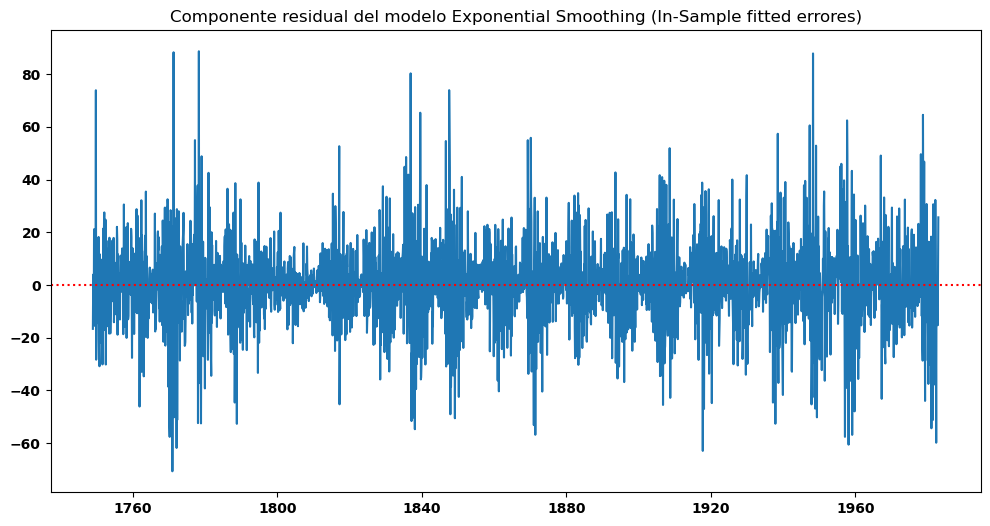

In [204]:
plt.plot(resid_exp_26_1_4)
plt.title("Componente residual del modelo Exponential Smoothing (In-Sample fitted errores)")
plt.axhline(y=0, color='r', linestyle=':')
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



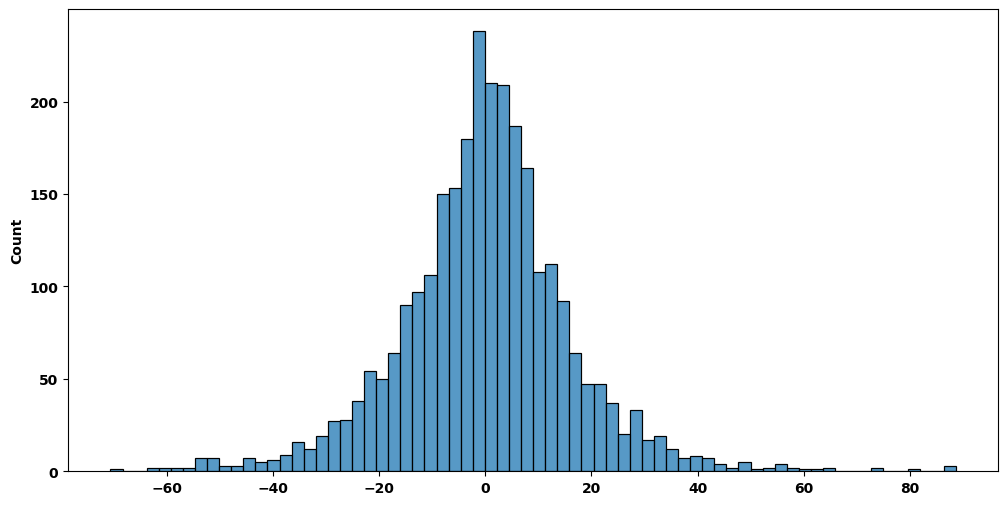

In [205]:
sns.histplot(data=resid_exp_26_1_4, bins=70)
plt.show()

c:\Users\aleja\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



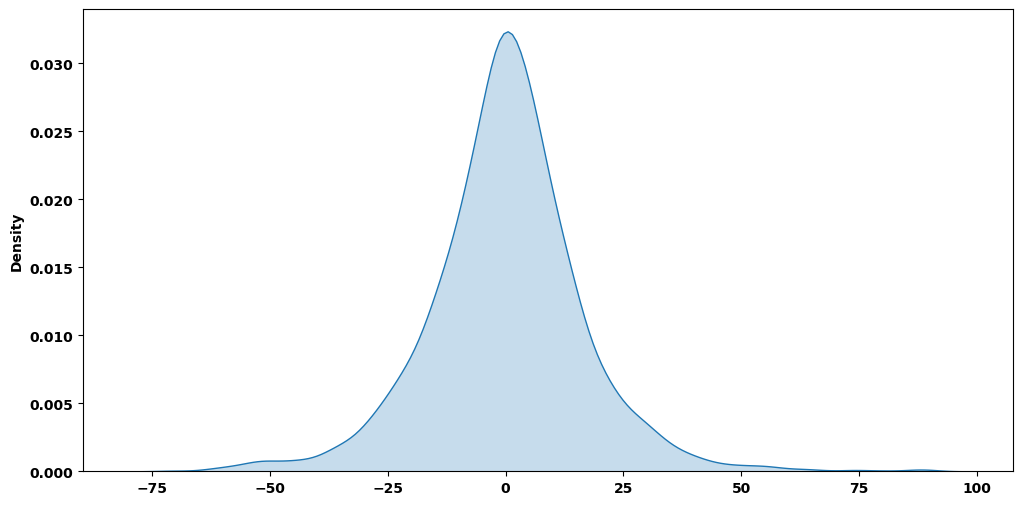

In [206]:
sns.kdeplot(data=resid_exp_26_1_4, fill=True)
plt.show()

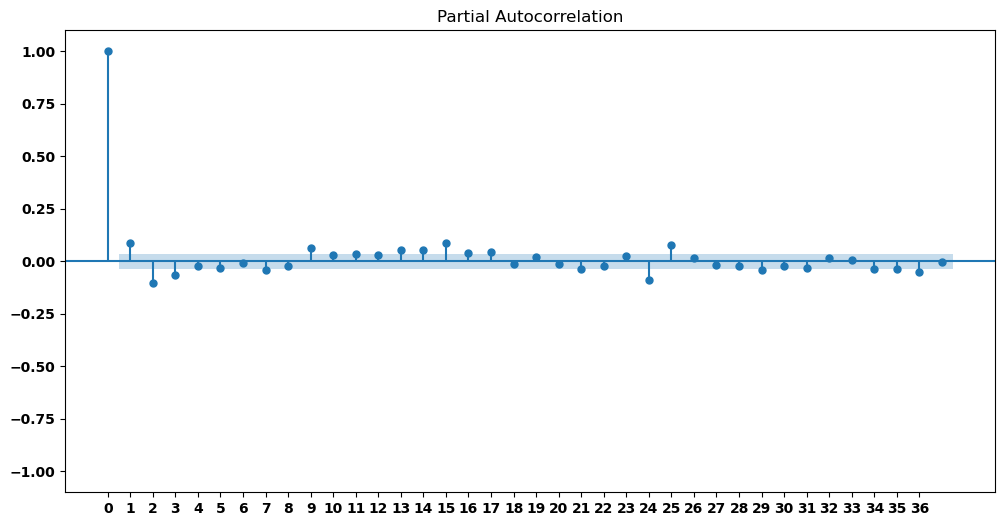

In [207]:
from statsmodels.graphics.tsaplots import plot_pacf

plot_pacf(resid_exp_26_1_4, lags=37, method='ywm')
plt.xticks(np.arange(37))
plt.ylim(-1.1,1.1)
plt.show()

0.17


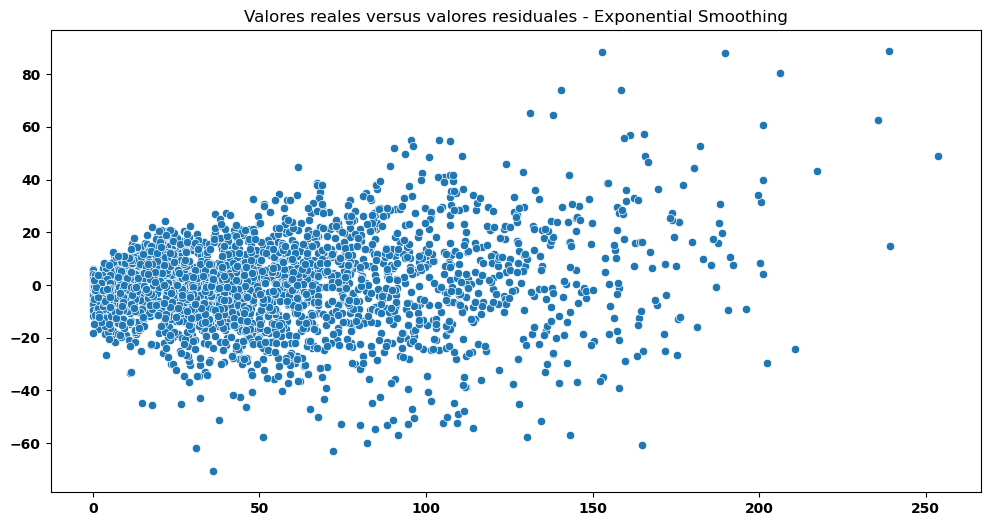

In [208]:
print(df_train_spot['Sunspots'].corr(resid_exp_26_1_4).round(4))

sns.scatterplot(x=df_train_spot.values.flatten(), y=resid_exp_26_1_4)
plt.title("Valores reales versus valores residuales - Exponential Smoothing")
plt.show()

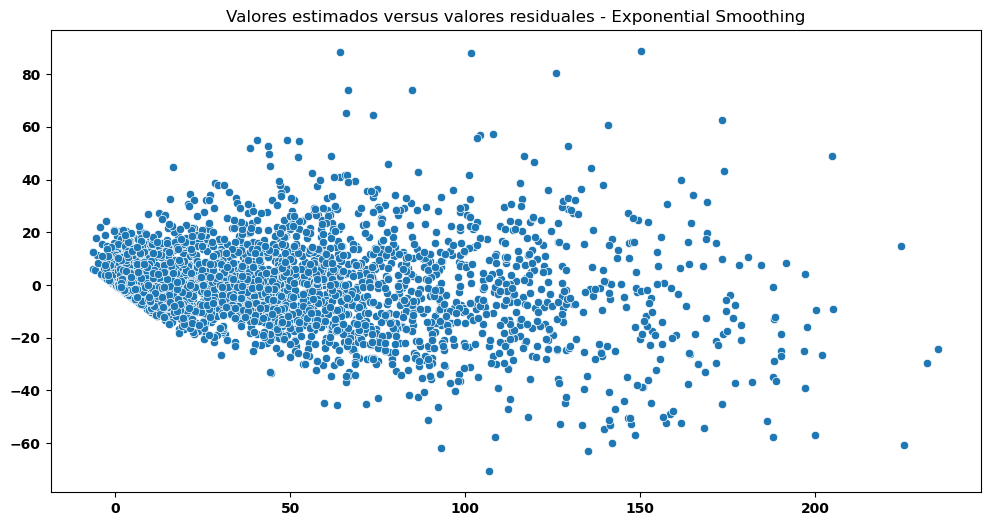

-0.2044


In [209]:
sns.scatterplot(x=estim_exp_26_1_4, y=resid_exp_26_1_4)
plt.title("Valores estimados versus valores residuales - Exponential Smoothing")
plt.show()

print(estim_exp_26_1_4.corr(resid_exp_26_1_4).round(4))

In [210]:
pred_exp_26_1_4 = fit_exp_26_1_4.forecast(steps=12).round()
pred_exp_26_1_4

1983-01-01    108.0
1983-02-01    113.0
1983-03-01    107.0
1983-04-01    109.0
1983-05-01    110.0
1983-06-01    111.0
1983-07-01    112.0
1983-08-01    114.0
1983-09-01    122.0
1983-10-01    114.0
1983-11-01    104.0
1983-12-01    111.0
Freq: MS, dtype: float64

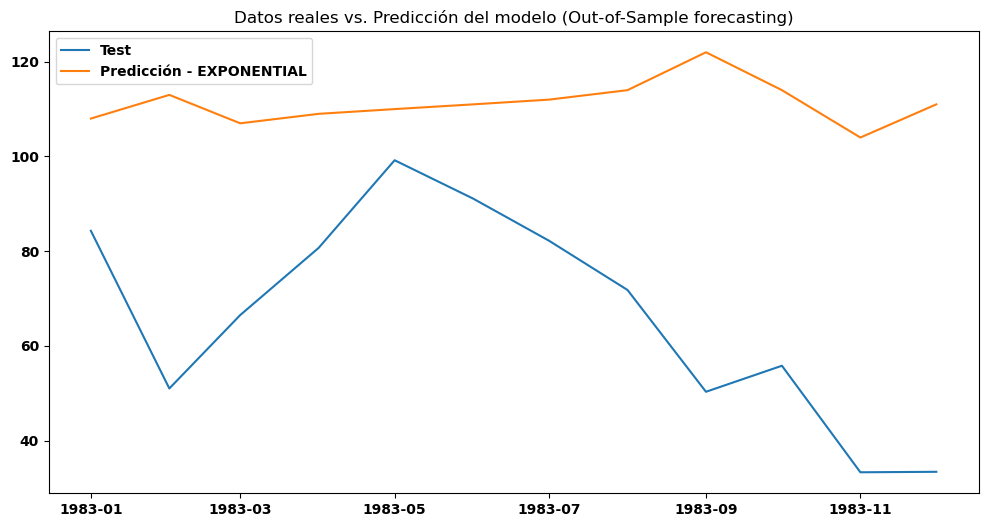

In [211]:
plt.plot(df_test_spot, label='Test')
plt.plot(pred_exp_26_1_4, label='Predicción - EXPONENTIAL')
plt.title("Datos reales vs. Predicción del modelo (Out-of-Sample forecasting)")
plt.legend()
plt.show()

In [212]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(
    x=df_train_spot.index,
    y=df_train_spot['Sunspots'],
    name="Entrenamiento",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=df_test_spot.index,
    y=df_test_spot['Sunspots'],
    name="Test",
    mode="lines"
    ))

fig.add_trace(go.Scatter(
    x=pred_exp_26_1_4.index,
    y=pred_exp_26_1_4,
    name="Predicción (Exponential)",
    mode="markers+lines"
    ))

fig.update_layout(title="Número de manchas solares de cada mes desde el año 1749 al 1983",
                  title_font_size=22,
                  xaxis_title = 'Fecha',
                  yaxis_title= 'Manchas solares'
                  )

fig.show()

In [213]:
print('Mean Absolute Error (MAE):', mean_absolute_error(df_test_spot, pred_exp_26_1_4))
print('Mean Absolute Percentage Error (MAPE):', mean_absolute_percentage_error(df_test_spot, pred_exp_26_1_4)*100)
print('Mean Squared Error (MSE):', mean_squared_error(df_test_spot, pred_exp_26_1_4))
print('Root Mean Squared Error (RMSE):', np.sqrt(mean_squared_error(df_test_spot, pred_exp_26_1_4)))
print('R^2 coefficient of determination:', r2_score(df_test_spot, pred_exp_26_1_4))

Mean Absolute Error (MAE): 44.61666666666667
Mean Absolute Percentage Error (MAPE): 88.74208358419287
Mean Squared Error (MSE): 2464.7283333333335
Root Mean Squared Error (RMSE): 49.6460303884745
R^2 coefficient of determination: -4.5991879840827705


#### Explicación 26.1.4
> Para el modelo de ExponentialSmoothing, podemos observar un resumen que confirma, entre otras cosas, el periodo de 12 periodos que hemos asignado al modelo.
>
> Una vez más, encontramos una tendencia para las estimaciones que tiene un parecido con los datos reales, pero con rrores notables aún.
>
> En este caso, no podemos obtener las cuatro gráficas de diagnóstico directamente, sino que ha sido necesario obtenerlas una a una. En este caso, a pesar de que algunas gráficas tienen parecido con las de los ejercicios anteriores. Ahora podemos destacar un histograma con una campana mucho más definida. O una gráfica de correlación donde, aun teniendo valores cercanos al 0. Podemos ver que es mucho más dificil identificar unos patrones o desviaciones claras.
>
> Tanto en las gráficas interactivas (de una forma más detallada) como en la gráfica de datos reales versus predicciones del modelo, podemos observar que las predicciones no se acercan en absolto a los datos reales, teniendo una gráfica bastante recta (oscilante entre 100 y 120), mientras que los datos reales estan muy alejados de tener esa tendencia.
>
>Por último, destacamos unas métricas con valores igual de malos, con un R2 e -4,6 aproximadamente, y un porcentaje de error muy alto.